In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tkinter as tk
from tkinter import filedialog

In [ ]:
# Initialising the CNN
classifier = Sequential()

In [ ]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [ ]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#adding 3rd layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

NameError: ignored

In [ ]:
# Step 3 - Flattening
classifier.add(Flatten())

In [ ]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = pathlib.Path("/content/drive/MyDrive/cell_images")
batch_size = 16
img_height = 64
img_width = 64

In [ ]:
#Reading Training Images from directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="training", seed=123,
    image_size=(img_height, img_width), batch_size=batch_size)

#Reading Validation Images from directory
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, validation_split=0.2, subset="validation", seed=123,
    image_size=(img_height, img_width), batch_size=batch_size)

Found 10260 files belonging to 3 classes.
Using 8208 files for training.
Found 10260 files belonging to 3 classes.
Using 2052 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
num_classes = 2

['Parasitized', 'Uninfected', 'cell_images']


Epoch 1/7
513/513 [==============================] - 51s 75ms/step - loss: 0.0019 - accuracy: 0.9984 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/7
513/513 [==============================] - 36s 70ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/7
513/513 [==============================] - 36s 70ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/7
513/513 [==============================] - 36s 71ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/7
513/513 [==============================] - 36s 71ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/7
513/513 [==============================] - 37s 71ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/7
513/513 [==============================] - 37s 71ms/step - loss: 0.0000e+00 - accuracy: 

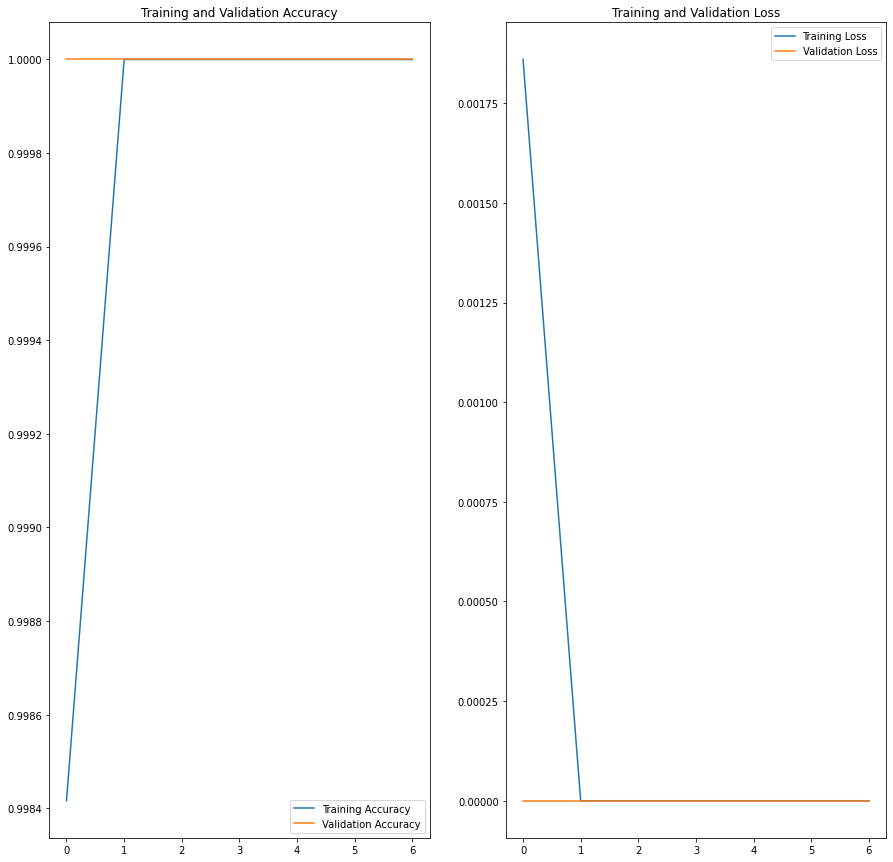

In [ ]:
#Defining CNN
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPool2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(num_classes)
])
noepochs=7

#model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),met)
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
mymodel = model.fit(train_ds, validation_data=val_ds,epochs=noepochs) #training the model
acc = mymodel.history['accuracy']
val_acc = mymodel.history['val_accuracy']
loss = mymodel.history['loss']
val_loss = mymodel.history['val_loss']
epochs_range = range(noepochs)
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from keras.models import load_model
classifier.save("malaria.h5")

In [ ]:
#prediction
#HAVING ISSUE WITH THIS CODE
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/162A0351.JPG', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Parasitized'
else:
    prediction = 'Uninfected'

In [ ]:
from google.colab import files
from IPython.display import Image
img_path= files.upload()
print(img_path)

Saving C33P1thinF_IMG_20150619_114756a_cell_179.png to C33P1thinF_IMG_20150619_114756a_cell_179 (1).png
{'C33P1thinF_IMG_20150619_114756a_cell_179.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x8e\x00\x00\x00\xa3\x08\x02\x00\x00\x00\xd3\xad\xb1\xb7\x00\x00\x00\x07tIME\x07\xe0\x07\r\x10\x1e6\x9d\x07\xbc\xd9\x00\x00 \x00IDATx\x9c\xec\xbd\xd9\xf3mIv\x1e\xf4}ke\xee\xf3\xbbC\xd5\xad.\xf5\x10\xc6\x96\tA\xf0\xcc\x83d\xc9\x12\x01\xc1\x03\x0e^\xc0\x98y\x8a \x80\xbf\x8b\x17#Y\x84,D\x84\x837^d\xd9\xc2\x12\xe0\xe0? l4`\xc9j\xa9\xab\xebN\xe7\x9c\x9dk-\x1eVf\xee<\xe7\xde\xaa\xae\xbau\xbb\xbb*`GG\xf5\xb9\xe7\xb7\xcf\x1er\xcd\xdf\x1a\x92\xf8\xe6\x1c\xaf~\xfbo\x93\x14\x11\x00\xee\x0e@U#""\x00\x90$\x99\x9f\xf3\x9f"B2O\x8e\x08\x92\xaa\xdaZ\xcb\xbfF\x84\x99=\xfa7\xff\xab\x9f\xda\xfb|\xc9\xa3\xfc\xb4\x1f\xe0\xcb\x1d\xb9\xc4y\x904\xb3\xa4\\R("\x92\x84yL\xa2&\x15E$\x7f\x95\xf4\x9b\'|S\x8eo\x18\xa90\xe81\xc5\x05\x83N\xf9aJ\xd8*^\x93<wgN\x9a}#\x8eo\xc0\xb3\xbe\xfe\xfb\xff=\xc9T\\w\x82\x92R5W|R\x02\x8

In [ ]:
img=keras.preprocessing.image.load_img("/content/drive/MyDrive/162A0351.JPG",target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)],100*np.max(score)))

This image most likely belongs to Parasitized with a 100.00 percent confidence.
